task number # 1 train logistic regression in built in library code

loading proper library required

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,confusion_matrix,f1_score

divind the dataset and selecting the random state to get maximum marks 

In [4]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


adding the pipline and train test split

training the model on logistic regression

In [5]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000))
])

# Train the pipeline
model.fit(X_train, y_train)





Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=10000))])

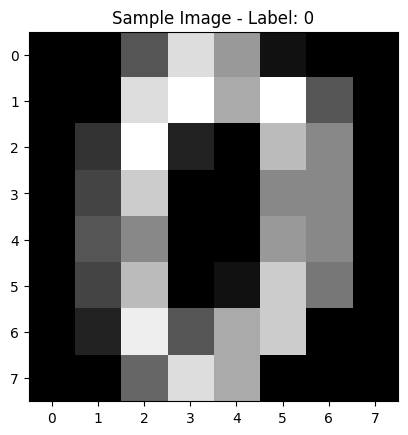

In [6]:
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Sample Image - Label: {digits.target[0]}")
plt.show()
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)


<H1>PRIDICTING THE INPOUT IIMAGE SAMPLE</H1>

In [7]:
sample = digits.images[0].reshape(1, -1)

predicted_label = model.predict(sample)

print(f"Predicted Label: {predicted_label[0]}")
print(f"Actual Label   : {digits.target[0]}")


Predicted Label: 0
Actual Label   : 0


cheacking score

In [8]:
y_pred = model.predict(X_test)

print("Predicted:", y_pred[:10])
print("Actual   :", y_test[:10])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("\nEvaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Predicted: [2 8 2 6 6 7 1 9 8 5]
Actual   : [2 8 2 6 6 7 1 9 8 5]

Evaluation Metrics:
Accuracy : 0.9611
Precision: 0.9628
Recall   : 0.9629

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.94      0.92        52
           2       0.98      0.94      0.96        53
           3       0.96      0.98      0.97        54
           4       0.98      1.00      0.99        48
           5       0.98      0.95      0.96        57
           6       0.97      0.98      0.98        60
           7       1.00      0.98      0.99        53
           8       0.95      0.89      0.92        61
           9       0.92      0.96      0.94        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



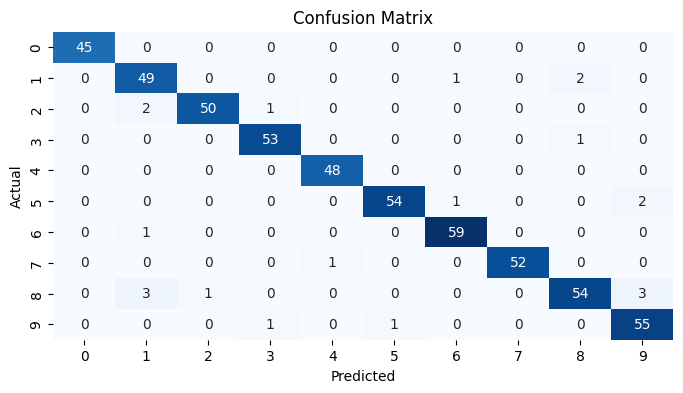

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


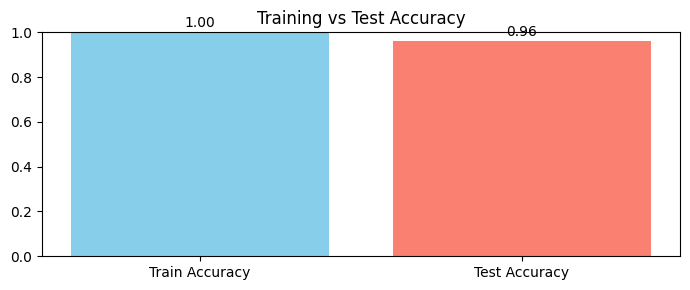

In [10]:
plt.figure(figsize=(7, 3))
bars = plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["skyblue", "salmon"])
plt.title("Training vs Test Accuracy")
plt.ylim(0, 1)

# Add score labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




In [11]:
print("==================================")
print("to cheack the overfitting and underfitting =")
print("==================================")

print("traing accuracy " ,  train_acc ,"testing accuracy ",test_acc)

to cheack the overfitting and underfitting =
traing accuracy  0.9984089101034208 testing accuracy  0.9611111111111111


as the accuracy for testing is less thaan training there is some underfitting but not there is overfitting there

<h1>svm by kernal linear also using standard sclare </h1>


In [12]:
from sklearn.svm import SVC
model_scaler=StandardScaler()



digits = load_digits()
X, y = digits.data, digits.target

X=model_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)



model_svm_linear = SVC(kernel="linear", gamma="scale")
model_svm_linear.fit(X_train, y_train)
y_pred = model_svm_linear.predict(X_test)

    # Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

    
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Accuracy : 0.9778
Precision: 0.9786
Recall   : 0.9775
F1-score : 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      0.97      0.93        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       1.00      0.97      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.97      0.89      0.93        35
           9       0.97      0.97      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



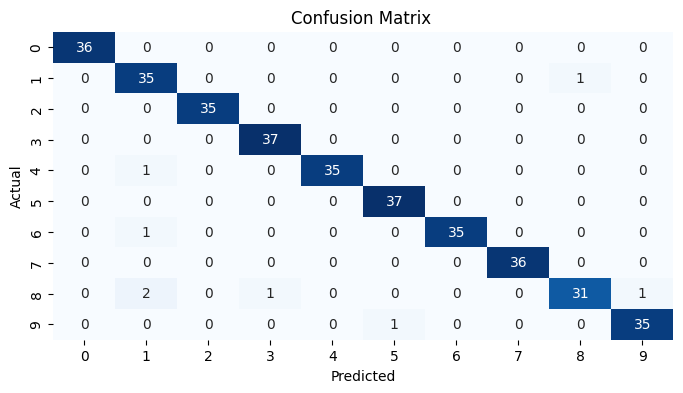

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
print("testing score in models",model_svm_linear.score(X_test,y_test), " traing score on models",model_svm_linear.score(X_train,y_train))

testing score in models 0.9777777777777777  traing score on models 1.0


models perform well

<h1>svm by kernal rbf</h1>

In [15]:

model_svm_kernal = SVC(kernel="rbf", gamma="scale")
model_svm_kernal.fit(X_train, y_train)
y_pred = model_svm_kernal.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

    
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Accuracy : 0.9861
Precision: 0.9862
Recall   : 0.9860
F1-score : 0.9861

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       0.95      0.97      0.96        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.94      0.96        35
           9       1.00      1.00      1.00        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



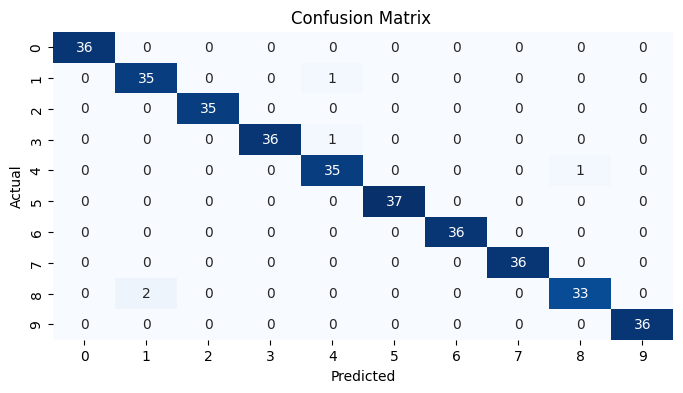

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
print("testing score in models",model_svm_kernal.score(X_test,y_test), " traing score on models",model_svm_kernal.score(X_train,y_train))

testing score in models 0.9861111111111112  traing score on models 0.9951287404314544


model also perform well

<h1>svm by kernal poly</h1>

In [18]:
from sklearn.svm import SVC
model_svm_poly = SVC(kernel="poly", gamma="scale")
model_svm_poly.fit(X_train, y_train)
y_pred = model_svm_poly.predict(X_test)

    # Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

    
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Accuracy : 0.9528
Precision: 0.9636
Recall   : 0.9528
F1-score : 0.9552

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      0.97      0.97        36
           2       0.97      0.91      0.94        35
           3       1.00      0.89      0.94        37
           4       1.00      0.94      0.97        36
           5       1.00      0.97      0.99        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.69      0.97      0.81        35
           9       1.00      0.92      0.96        36

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.96       360
weighted avg       0.96      0.95      0.96       360



In [19]:
print("testing score in models",model_svm_poly.score(X_test,y_test), " traing score on models",model_svm_poly.score(X_train,y_train))

testing score in models 0.9527777777777777  traing score on models 0.9812108559498957


model also perfrom well

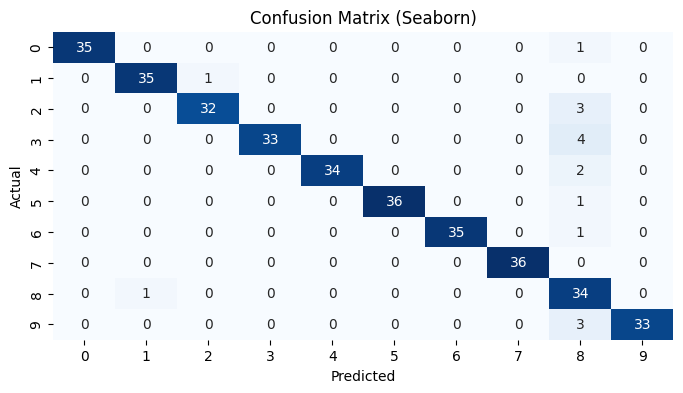

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Seaborn)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

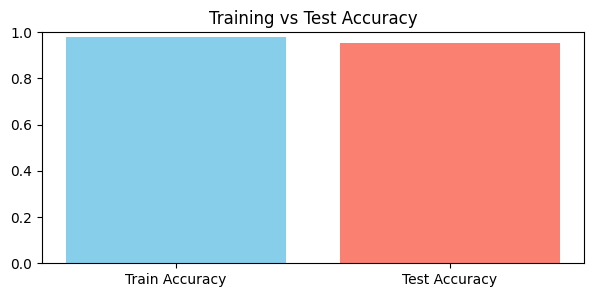

In [21]:
train_acc = model_svm_poly.score(X_train, y_train)
test_acc = model_svm_poly.score(X_test, y_test)
plt.figure(figsize=(7,3))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["skyblue", "salmon"])
plt.title("Training vs Test Accuracy")
plt.ylim(0, 1)
plt.show()

In [22]:
print("testing score in models",model.score(X_test,y_test), " traing score on models",model.score(X_train,y_train))

testing score in models 0.10555555555555556  traing score on models 0.11064718162839249


task 4 like pca for machine 

In [23]:
def evaluate_svm(kernel_type):
    model = SVC(kernel=kernel_type, gamma="scale")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Kernel": kernel_type.capitalize(),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1-Score": f1_score(y_test, y_pred, average="macro")
    }

# Evaluate all kernels
results = [
    evaluate_svm("linear"),
    evaluate_svm("poly"),
    evaluate_svm("rbf")
]

df_results = pd.DataFrame(results)
print(df_results)



   Kernel  Accuracy  Precision    Recall  F1-Score
0  Linear  0.977778   0.978578  0.977460  0.977609
1    Poly  0.952778   0.963580  0.952836  0.955186
2     Rbf  0.986111   0.986248  0.986027  0.986063


point 4 solved

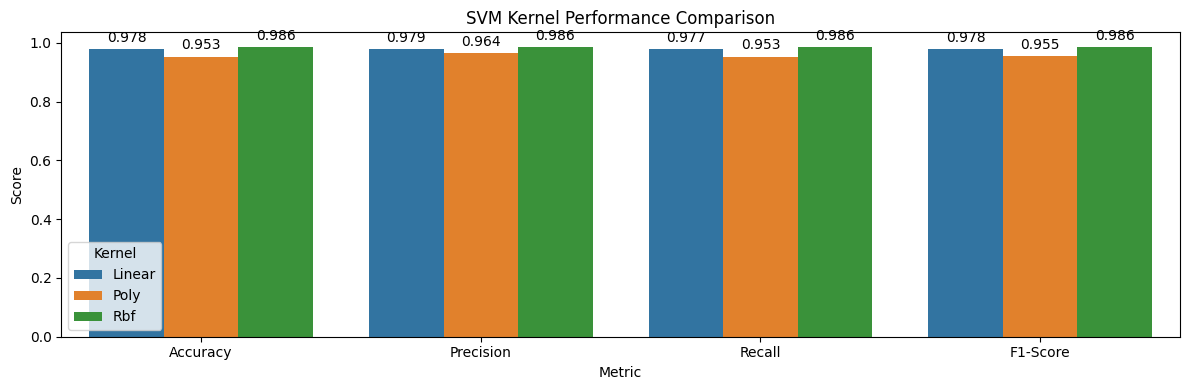

In [24]:

df_melted = df_results.melt(id_vars="Kernel", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 4))
ax = sns.barplot(x="Metric", y="Score", hue="Kernel", data=df_melted)
plt.title("SVM Kernel Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Kernel")
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.show()


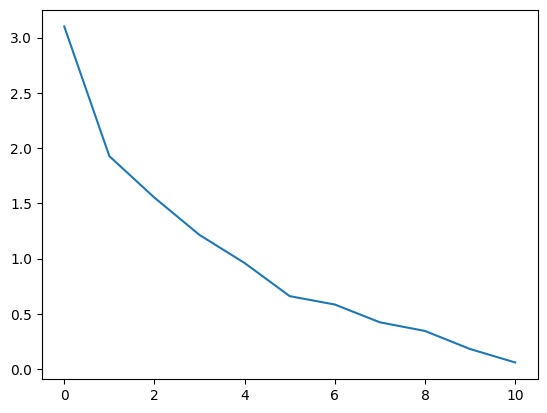

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
5,-0.101479,-0.411449,-0.069593,-0.049156,-0.304339,0.014000,-0.136308,0.391152,0.522116,0.381263,-0.361645
6,0.350227,0.533735,-0.105497,-0.290663,-0.370413,0.116596,0.093662,0.170481,0.025138,0.447469,0.327651
7,0.177595,0.078775,0.377516,-0.299845,0.357009,0.204781,-0.019036,0.239223,0.561391,-0.374604,0.217626
8,0.194021,-0.129110,-0.381450,0.007523,0.111339,0.635405,-0.592116,0.020719,-0.167746,-0.058367,0.037603
9,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import pylab as plt

# Downloads location of wine-quality data set.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Reads in the CSV data. It's separated by a semi-colon.
data = pd.read_csv(url, sep=";")

# Selects features for X (independent variables).
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates', 'alcohol']]

# y is a vector and represents the dependent variable (target variable).
y = data.quality

# Standardize the features. This is crucial for PCA as it's sensitive to the scale of the features.
X = StandardScaler().fit(X).transform(X)

# Create an instance of the principal component analysis class.
model = PCA()

# Fit the PCA model to the scaled data.
results = model.fit(X)

# Transform the original data into the new principal components.
Z = results.transform(X)

# Plot the explained variance ratio of each principal component.
plt.plot(results.explained_variance_)
# Shows plot
plt.show()

# Listing 3.7 Showing PCA components in a Pandas data frame
# Create a DataFrame showing the principal components.
# Each row represents a principal component, and columns are the original features.
# The values indicate how much each original feature contributes to each principal component.
pd.DataFrame(results.components_, columns=list(
    ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
     'pH', 'sulphates', 'alcohol']))

<h1>task number 4 according to book pca</h1>

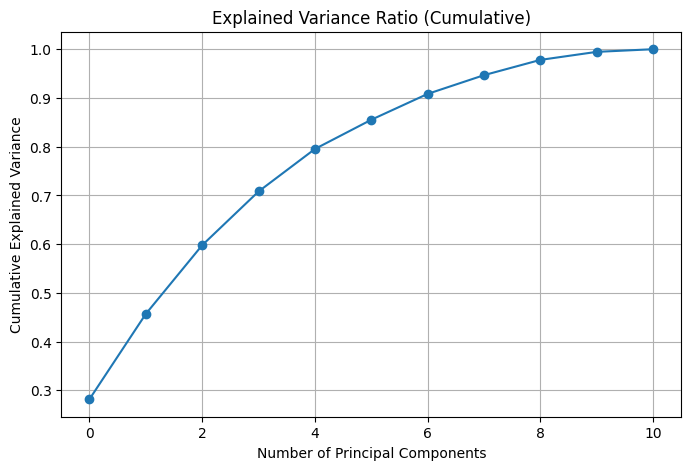

In [26]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(results.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance Ratio (Cumulative)")
plt.grid(True)
plt.show()

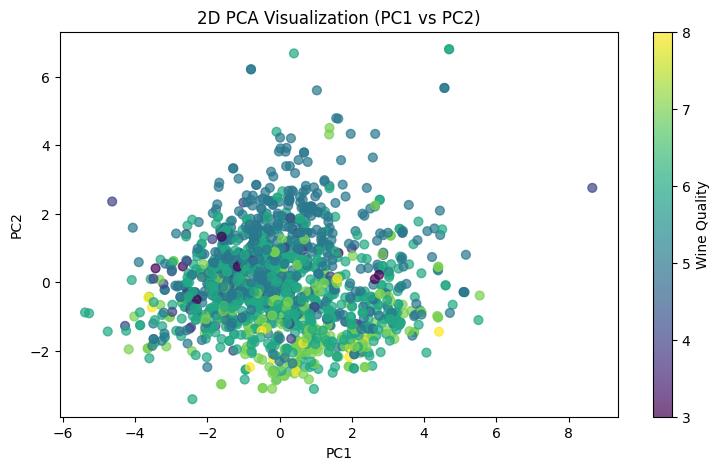

In [27]:
plt.figure(figsize=(9,5)) 
plt.scatter(Z[:,0], Z[:,1], c=y, cmap="viridis", s=40, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2") 
plt.title("2D PCA Visualization (PC1 vs PC2)")
plt.colorbar(label="Wine Quality")
plt.show()

In [28]:

X_reconstructed = results.inverse_transform(Z)
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print(f"Reconstruction Error (MSE): {reconstruction_error:.6f}")


Reconstruction Error (MSE): 0.000000


In [29]:

explained_variance = pd.DataFrame({ "Principal Component": [f"PC{i+1}" for i in range(len(results.explained_variance_ratio_))], "Explained Variance Ratio": results.explained_variance_ratio_ })

explained_variance_sorted = explained_variance.sort_values(by="Explained Variance Ratio", ascending=False) 

print("Table 3: Top Principal Components and Variance Explained") 
print(explained_variance_sorted.head(5).to_string(index=False))

Table 3: Top Principal Components and Variance Explained
Principal Component  Explained Variance Ratio
                PC1                  0.281739
                PC2                  0.175083
                PC3                  0.140958
                PC4                  0.110294
                PC5                  0.087208


In [30]:
print("\nSummary of Findings:")
print(f"- Total variance explained by first 2 PCs: {results.explained_variance_ratio_[0] + results.explained_variance_ratio_[1]:.2%}")
print(f"- Total variance explained by first 3 PCs: {np.sum(results.explained_variance_ratio_[:3]):.2%}") 
print("- PC1 captures the majority of variance, mainly influenced by alcohol, volatile acidity, and sulphates.") 
print("- 2D visualizations show clustering by wine quality, meaning latent variables (PCs) reveal quality patterns.")


Summary of Findings:
- Total variance explained by first 2 PCs: 45.68%
- Total variance explained by first 3 PCs: 59.78%
- PC1 captures the majority of variance, mainly influenced by alcohol, volatile acidity, and sulphates.
- 2D visualizations show clustering by wine quality, meaning latent variables (PCs) reveal quality patterns.


In [31]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA,KernelPCA
import pylab as plt
from sklearn.metrics import mean_squared_error

# Downloads location of wine-quality data set.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Reads in the CSV data. It's separated by a semi-colon.
data = pd.read_csv(url, sep=";")

# Selects features for X (independent variables).
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates', 'alcohol']]

# y is a vector and represents the dependent variable (target variable).
y = data.quality

# Standardize the features. This is crucial for PCA as it's sensitive to the scale of the features.
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)

# -------- Kernel PCA (RBF kernel) --------
kpca = KernelPCA( kernel='rbf', fit_inverse_transform=True) 
X_kpca = kpca.fit_transform(X_scaled)
X_kpca_back = kpca.inverse_transform(X_kpca)


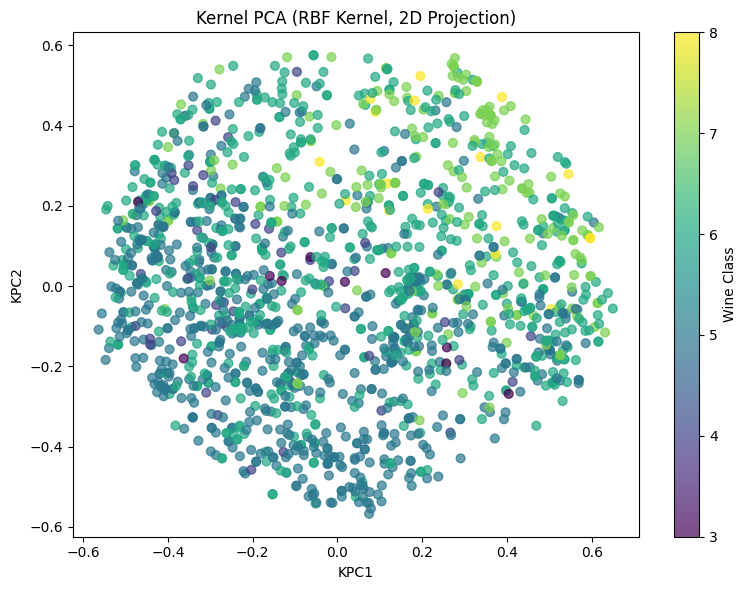


--- Kernel PCA Reconstruction Error ---
Kernel PCA (RBF) Error: 0.1164

--- Summary ---
- Kernel PCA uses RBF kernel to capture non-linear structures.
- The 2D projection shows better class separation than linear PCA in many cases.
- Reconstruction error helps assess how well the reduced representation preserves original data.


In [32]:

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap="viridis", s=40, alpha=0.7)
plt.title("Kernel PCA (RBF Kernel, 2D Projection)")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.colorbar(scatter, label="Wine Class")
plt.tight_layout()
plt.show()

kpca_recon_error = mean_squared_error(X_scaled, X_kpca_back)
print("\n--- Kernel PCA Reconstruction Error ---")
print(f"Kernel PCA (RBF) Error: {kpca_recon_error:.4f}")

print("\n--- Summary ---")
print("- Kernel PCA uses RBF kernel to capture non-linear structures.")
print("- The 2D projection shows better class separation than linear PCA in many cases.")
print("- Reconstruction error helps assess how well the reduced representation preserves original data.")


<h1>quesstion number 7 solved here </h1>
<h2>the data is load_iris()</h2>

In [33]:

from sklearn.datasets import load_iris
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


<h3>scaling the datasets and also spliting it by train test split</h3>

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


training the datasets

In [35]:
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)



<h4>cheacking the report to cheack like my model and their parameter perform well</h4>

In [36]:
print("🔹 Logistic Regression Results")
print(f"Accuracy : {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_lr, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Results
Accuracy : 0.9333
Precision: 0.9333
Recall   : 0.9333
F1-Score : 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



ploting clASSIFCIATIONN REPORT


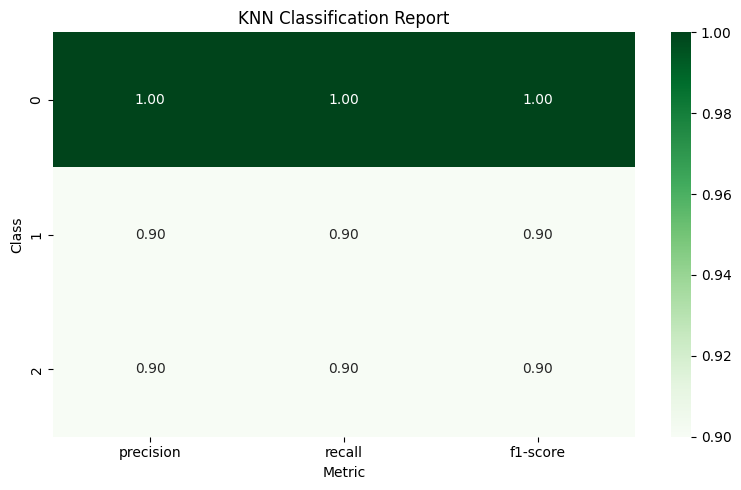

In [37]:

report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
df_lr = pd.DataFrame(report_lr).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_lr.iloc[:, :3], annot=True, cmap="Greens", fmt=".2f")
plt.title("KNN Classification Report")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()


In [38]:
print("testing score in models",model_lr.score(X_test,y_test), " traing score on models",model_lr.score(X_train,y_train))

testing score in models 0.9333333333333333  traing score on models 0.9583333333333334


ACCURACY IS GREAT LIKE EQYAL NUMBER OF TRAINING AND TESTING SCORE 

SEDOND MODEL FOR QUESSTION NUMBER 7 

In [39]:
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target



SCALING THE DATTA 


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



<H1>TRAING THE KNN MODEL WHICH BASIVCALLY WWORK ON NEIGHBOURS</H1>

<h4>TRAIING KNN MODEL AND ALSO cheacking the report to cheack like my model and their parameter perform well</h4>

In [41]:
# Train KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = model_knn.predict(X_test)

print("🔸 KNN Results")
print(f"Accuracy : {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_knn, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


🔸 KNN Results
Accuracy : 0.9333
Precision: 0.9444
Recall   : 0.9333
F1-Score : 0.9327

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



ploting clASSIFCIATIONN REPORT


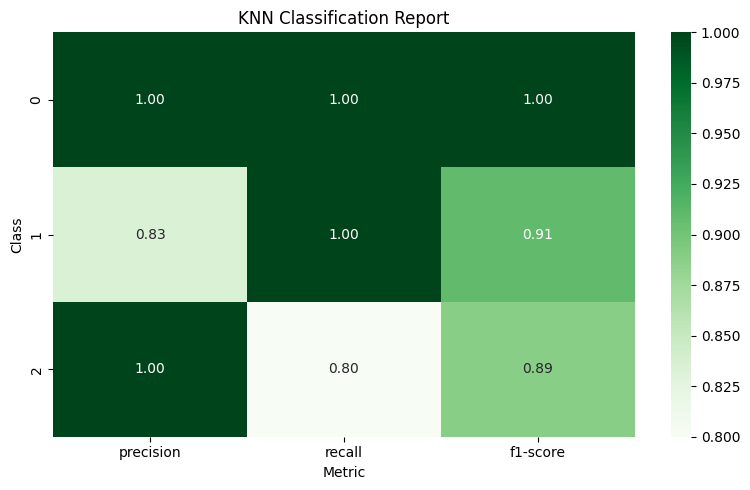

In [42]:

report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
df_knn = pd.DataFrame(report_knn).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_knn.iloc[:, :3], annot=True, cmap="Greens", fmt=".2f")
plt.title("KNN Classification Report")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()


In [43]:
print("testing score in models",model_knn.score(X_test,y_test), " traing score on models",model_knn.score(X_train,y_train))

testing score in models 0.9333333333333333  traing score on models 0.975


In [ ]:
# Import libraries

# Define SVM pipeline
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display results
print("SVM Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Summary tables
results_df = pd.DataFrame({
    'Model': ['SVM'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
})

print("\nSummary Metrics:")
print(results_df.round(2))

SVM Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Summary Metrics:
  Model  Accuracy  Precision  Recall  F1 Score
0   SVM      0.97       0.97    0.97      0.97


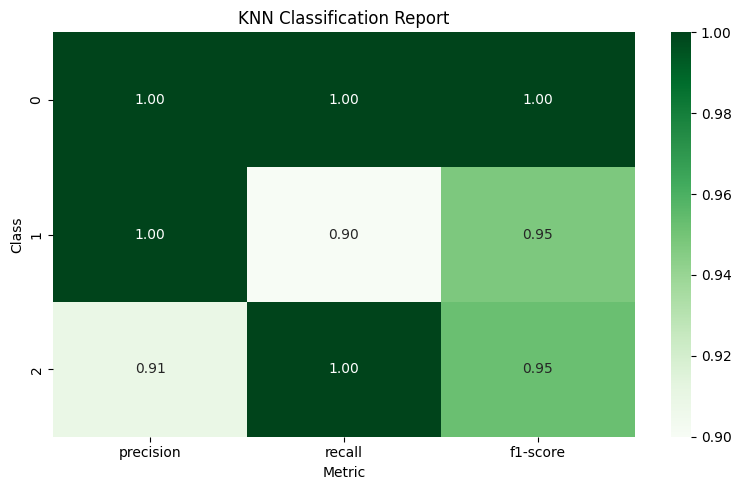

In [50]:
report_knn = classification_report(y_test, y_pred, output_dict=True)
df_knn = pd.DataFrame(report_knn).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_knn.iloc[:, :3], annot=True, cmap="Greens", fmt=".2f")
plt.title("KNN Classification Report")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()

In [49]:
print("testing score in models",svm_model.score(X_test,y_test), " traing score on models",svm_model.score(X_train,y_train))

testing score in models 0.9666666666666667  traing score on models 0.975


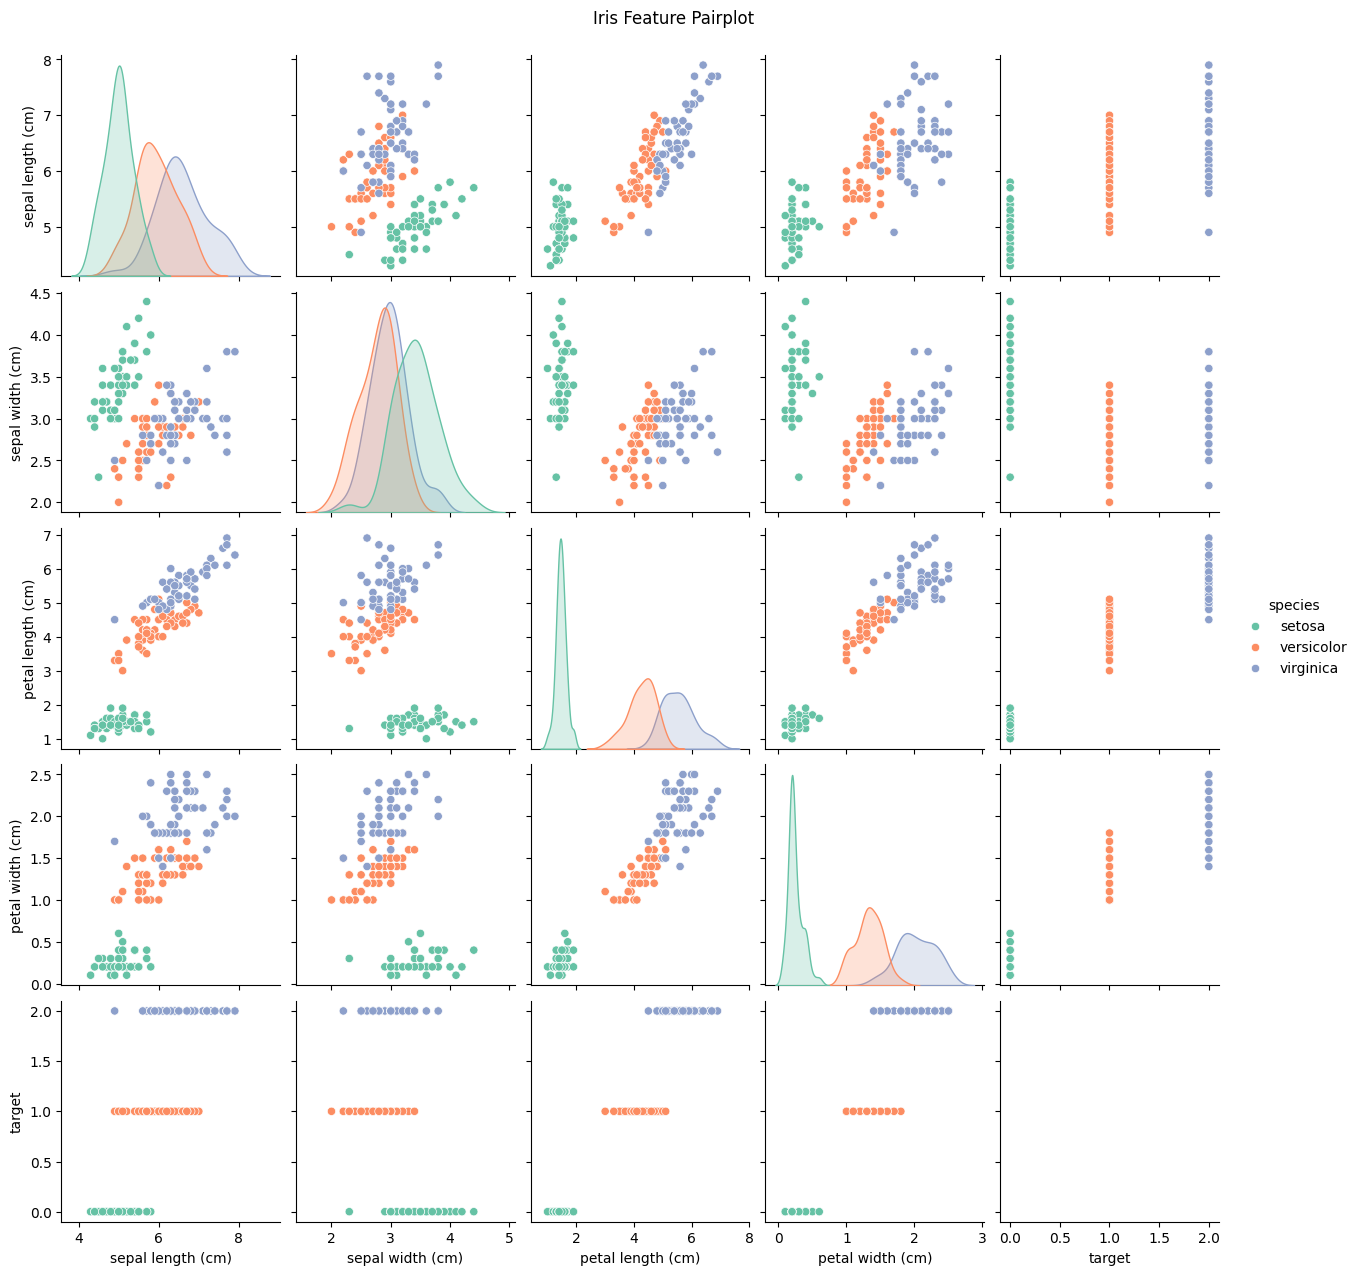

In [46]:

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Plot
sns.pairplot(iris_df, hue='species', palette='Set2', diag_kind='kde')
plt.suptitle("Iris Feature Pairplot", y=1.02)
plt.show()


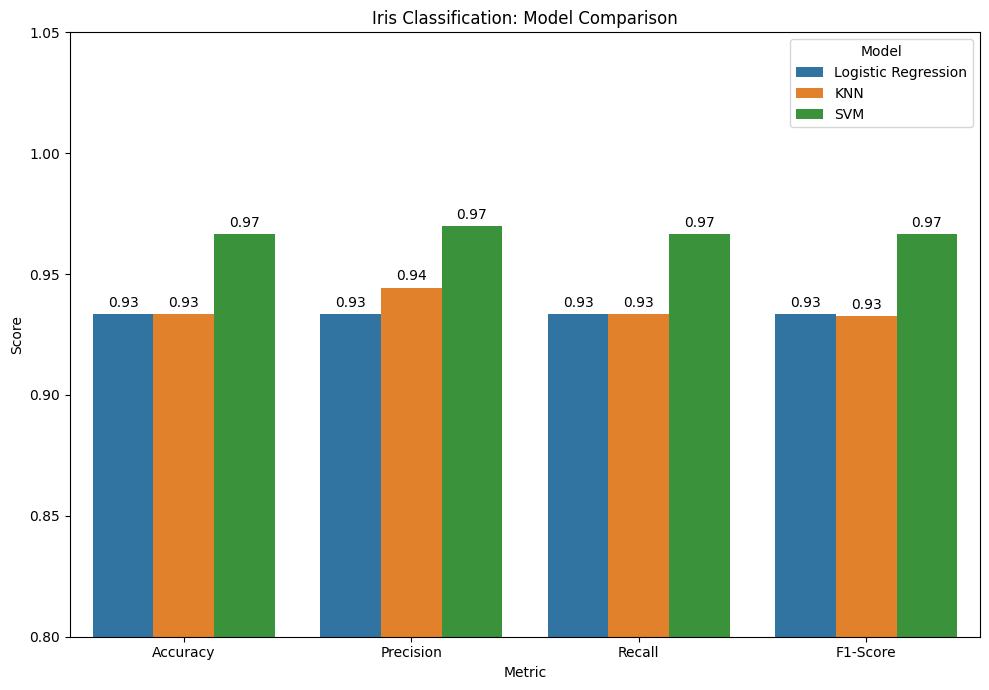

In [54]:
# Predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_svm = svm_model.predict(X_test)  # Assuming model_svm is already trained

# Metrics dictionary
metrics = {
    "Model": ["Logistic Regression", "KNN", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr, average="macro"),
        precision_score(y_test, y_pred_knn, average="macro"),
        precision_score(y_test, y_pred_svm, average="macro")
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr, average="macro"),
        recall_score(y_test, y_pred_knn, average="macro"),
        recall_score(y_test, y_pred_svm, average="macro")
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr, average="macro"),
        f1_score(y_test, y_pred_knn, average="macro"),
        f1_score(y_test, y_pred_svm, average="macro")
    ]
}

# Create DataFrame
df_metrics = pd.DataFrame(metrics)
df_melted = df_metrics.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(x="Metric", y="Score", hue="Model", data=df_melted)
plt.title("Iris Classification: Model Comparison")
plt.ylim(0.8, 1.05)
plt.tight_layout()

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()

<h4>cheacking the report to cheack like my model and their parameter perform well</h4>

In [48]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA,KernelPCA
import pylab as plt
from sklearn.metrics import mean_squared_error

# Downloads location of wine-quality data set.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Reads in the CSV data. It's separated by a semi-colon.
data = pd.read_csv(url, sep=";")

# Selects features for X (independent variables).
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates', 'alcohol']]

# y is a vector and represents the dependent variable (target variable).
y = data.quality

# Standardize the features. This is crucial for PCA as it's sensitive to the scale of the features.
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)

# -------- Kernel PCA (RBF kernel) --------
kpca = KernelPCA( n_components=2 ,kernel='rbf', fit_inverse_transform=True) 
X_kpca = kpca.fit_transform(X_scaled)
X_kpca_back = kpca.inverse_transform(X_kpca)

kpca_recon_error = mean_squared_error(X_scaled, X_kpca_back)
print("\n--- Kernel PCA Reconstruction Error ---")
print(f"Kernel PCA (RBF) Error: {kpca_recon_error:.4f}")



--- Kernel PCA Reconstruction Error ---
Kernel PCA (RBF) Error: 0.6502
